<a href="https://colab.research.google.com/github/bikram947/Find-0-hop-and-1-hop-routes/blob/master/covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '14_4PbKRNhIyFh5__-iFR8pLiDUJSu9xI'})
download.GetContentFile('Covid_dataset.zip')
#download.GetContentFile('TrainFolder.zip')
!unzip Covid_dataset.zip

Archive:  Covid_dataset.zip
replace Covid-19 Image Dataset/test/Covid/0100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Covid-19 Image Dataset/test/Covid/0100.jpeg  
  inflating: Covid-19 Image Dataset/test/Covid/0102.jpeg  
  inflating: Covid-19 Image Dataset/test/Covid/0105.png  
  inflating: Covid-19 Image Dataset/test/Covid/0106.jpeg  
  inflating: Covid-19 Image Dataset/test/Covid/0108.jpeg  
  inflating: Covid-19 Image Dataset/test/Covid/0111.jpg  
  inflating: Covid-19 Image Dataset/test/Covid/0112.jpg  
  inflating: Covid-19 Image Dataset/test/Covid/0113.jpg  
  inflating: Covid-19 Image Dataset/test/Covid/0115.jpeg  
  inflating: Covid-19 Image Dataset/test/Covid/0118.jpeg  
  inflating: Covid-19 Image Dataset/test/Covid/0119.jpeg  
  inflating: Covid-19 Image Dataset/test/Covid/0120.jpg  
  inflating: Covid-19 Image Dataset/test/Covid/094.png  
  inflating: Covid-19 Image Dataset/test/Covid/096.png  
  inflating: Covid-19 Image Dataset/test/Covid/098.jpeg  
  in

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import keras 

from sklearn.model_selection import train_test_split 
#from keras.utils import to_categorical 

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Dense, Dropout 
from keras.layers import Flatten, BatchNormalization

import cv2

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

'''
We are intentionally combining the train and test data sets.
So that we can vary the ratio as and when required directly from the code itself.
'''


folder1=r"/content/Covid-19 Image Dataset/test/Covid"
folder2=r"/content/Covid-19 Image Dataset/test/Normal"
folder3=r"/content/Covid-19 Image Dataset/test/Viral Pneumonia"
folder4=r"/content/Covid-19 Image Dataset/train/Covid"
folder5=r"/content/Covid-19 Image Dataset/train/Normal"
folder6=r"/content/Covid-19 Image Dataset/train/Viral Pneumonia"

li1=load_images_from_folder(folder1)
li2=load_images_from_folder(folder2)
li3=load_images_from_folder(folder3)
li4=load_images_from_folder(folder4)
li5=load_images_from_folder(folder5)
li6=load_images_from_folder(folder6)
#print(li1)

li=li1+li2+li3+li4+li5+li6
n=len(li)

In [ ]:
lab1=[]

#Since there are only 3 categories, we have directly used the one-hot encoded values for 1,2 and 3

for i in range(len(li1)):
    lab1.append([1,0,0])
for i in range(len(li2)):
    lab1.append([0,1,0])
for i in range(len(li3)):
    lab1.append([0,0,1])
for i in range(len(li4)):
    lab1.append([1,0,0])
for i in range(len(li5)):
    lab1.append([0,1,0])
for i in range(len(li6)):
    lab1.append([0,0,1])

In [ ]:
for i in range(n):
 li[i]=cv2.resize(li[i],(480,640))
 li[i]=li[i]/255.0

li = np.array(li)
li = li.reshape(li.shape + (1,))

lab1 = np.asarray(lab1).astype('int32')

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(640,480,1)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    return model

model = baseline_model()
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 640, 480, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 640, 480, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 320, 240, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 320, 240, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 320, 240, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 240, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 120, 64)      0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(li, lab1, test_size=0.20)

history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))


Epoch 1/10
8/8 [==============================] - 160s 17s/step - loss: 1.5953 - accuracy: 0.4371 - val_loss: 1.0824 - val_accuracy: 0.4062
Epoch 2/10
8/8 [==============================] - 136s 17s/step - loss: 0.8057 - accuracy: 0.6477 - val_loss: 1.0597 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 136s 17s/step - loss: 0.5611 - accuracy: 0.7701 - val_loss: 1.0412 - val_accuracy: 0.7656
Epoch 4/10
8/8 [==============================] - 136s 17s/step - loss: 0.5180 - accuracy: 0.7804 - val_loss: 1.0328 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 135s 17s/step - loss: 0.3784 - accuracy: 0.8798 - val_loss: 1.0073 - val_accuracy: 0.9062
Epoch 6/10
8/8 [==============================] - 136s 17s/step - loss: 0.3783 - accuracy: 0.8370 - val_loss: 0.9841 - val_accuracy: 0.7969
Epoch 7/10
8/8 [==============================] - 135s 17s/step - loss: 0.2812 - accuracy: 0.9014 - val_loss: 0.9735 - val_accuracy: 0.8750
Epoch 8/10
8/8 [====

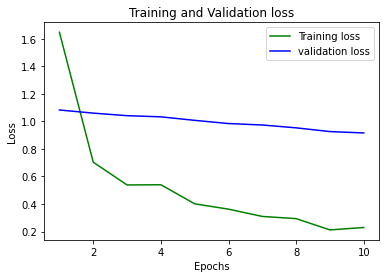

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

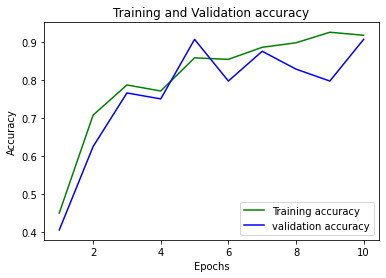

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

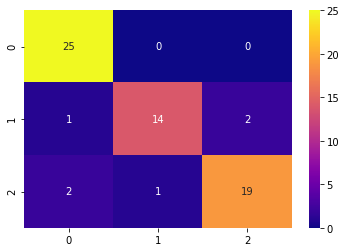

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.array(y_pred)
y_test=np.array(y_test)
y_pred_=[]
y_test_=[]
for i in range(len(y_pred)):
  m=max(y_pred[i])
  for j in range(3):
    if(y_pred[i][j]==m):
      y_pred_.append(j)
      break
for i in range(len(y_test)):
  for j in range(3):
    if(y_test[i][j]==1):
      y_test_.append(j)
      break
#print(y_test_)
#print(y_pred_)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_, y_pred_)

import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)

In [ ]:
model.save('my_model.h5')

In [ ]:
new_model=keras.models.load_model('my_model.h5')

In [ ]:
loss, acc = new_model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 8s 3s/step - loss: 0.9159 - accuracy: 0.9062


In [ ]:
def pred_one_img(img):
   img=cv2.resize(img,(480,640))
   img=img/255.0
   img = img.reshape(img.shape + (1,))
   return img
img=pred_one_img(cv2.imread("/content/Covid-19 Image Dataset/test/Covid/0111.jpg",0))
prediction=new_model.predict(np.expand_dims(img,axis=0))
print(np.where(prediction[0]==max(prediction[0]))[0])

[0]


In [ ]:
!pip install flask_ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
app=Flask(__name__, template_folder='/content/templates', static_folder='/content/templates')
run_with_ngrok(app)
@app.route("/")
def home():
  return render_template("index.html")
@app.route("/predict",methods=['POST'])
def predict():
  f=request.files['file']
  f.save(f.filename)
  def pred_one_img(img):
    img=cv2.resize(img,(480,640))
    img=img/255.0
    img = img.reshape(img.shape + (1,))
    return img
  img=pred_one_img(cv2.imread("/content/"+str(f.filename),0))
  prediction=new_model.predict(np.expand_dims(img,axis=0))
  class_level=np.where(prediction[0]==max(prediction[0]))[0][0]
  if(class_level==0):
    cls="COVID"
  elif(class_level==1):
    cls="Normal"
  else:
    cls="Viral Pneumonia"
  return render_template("index.html", Prediction=cls)

app.run()